NICHOLAS GUTIERREZ, UDAYVEER SINGH ANDOTRA, RIDWANUR SARDER
CS 512
Pr.Abello


Description: Implement an algorithm that takes as input a 3SAT formula 𝐹 with 𝑚 clauses and 𝑛 variables, and produces as output a graph 𝐺𝐹=(𝑉,𝐸), with |𝑉| = 3𝑚, |𝐸| = 3𝑚 + 𝑘, where 𝑘=𝑂(𝑚2) encoding the formula. This means that if the formula 𝐹 is satisfiable, the corresponding graph 𝐺𝐹 will contain an Independent Set of size 𝑚, and if the formula 𝐹 is not satisfiable, then the corresponding graph 𝐺𝐹 will not contain an Independent Set of size 𝑚.

Output: Experimental Cuisine

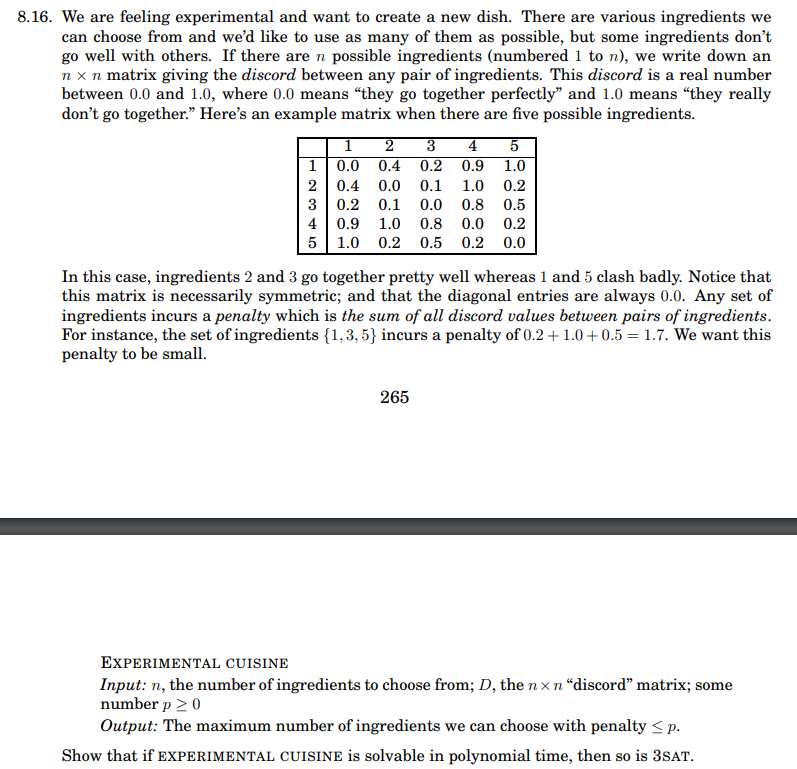

In [108]:
import itertools
from typing import List, Dict, Tuple
import numpy as np
import pandas as pd
from collections import defaultdict

## Processing Input
### Replace the 3sat_clauses.csv with whatever csv 3sat file you have. It should be a CSV file with only three columns of values (rows = number of clauses). Each cell should have an integer to represent a variable, with negative integers representing the negation of a variable. Please do not include zeros.

In [109]:
#Processing

df = pd.read_csv('3sat_clauses_2.csv', header=None)

clauses = df.values.tolist()

all_vars = set()
processed_clauses = []
for clause in clauses:
  clause_literals = []
  for lit in clause:
    lit_int = int(lit)
    clause_literals.append(lit_int)
    all_vars.add(abs(lit_int))
  processed_clauses.append(clause_literals)

all_vars = sorted(all_vars)
num_vars = len(all_vars)
num_clauses = len(processed_clauses)

print(f"Variables: {all_vars}")
print(f"Number of Variables: {num_vars}")
print(f"Number of Clauses: {num_clauses}")
print(f"Processed Clauses: {processed_clauses}")

Variables: [1, 2, 3]
Number of Variables: 3
Number of Clauses: 4
Processed Clauses: [[1, 2, 3], [1, -2, -3], [-1, 2, -3], [-1, -2, 3]]


# Experimental Cuisine Setup and Transformation from 3SAT to Experimental Cuisine

In [110]:
# ingredient setup

ingredients = [] #basically list of assignments
# list of dictionaries, each with clause_ind and assignments
# ex: { 'clause_ind': 1, 'assignment': [1, -2, -4] }

for clause_ind, clause in enumerate(processed_clauses):
  literals = clause

  #for maintaining relations and getting all assignments accurately
  vars_in_clause = [abs(literal) for literal in literals]
  negations = [-1 if literal < 0 else 1 for literal in literals]

  # get all 8 possible assignments (2^3)
  for var1 in [1, -1]:
    for var2 in [1, -1]:
      for var3 in [1, -1]:
        assignment = []
        satisfies = False
        current_values = [var1, var2, var3]

        # assigning vars, positive true negative false
        for i in range(3):
          var = vars_in_clause[i] * current_values[i] * negations[i]
          assignment.append(var)

        # check if the assignment satisfies clause
        for i in range(3):
          if assignment[i] * negations[i] > 0:
            satisfies = True
            break

        if satisfies:
          ingredients.append({'clause_ind': clause_ind, 'assignment': assignment.copy()})

print(f"Total Ingredients: {len(ingredients)}")
for ingredient in ingredients:
  print(ingredient)


Total Ingredients: 28
{'clause_ind': 0, 'assignment': [1, 2, 3]}
{'clause_ind': 0, 'assignment': [1, 2, -3]}
{'clause_ind': 0, 'assignment': [1, -2, 3]}
{'clause_ind': 0, 'assignment': [1, -2, -3]}
{'clause_ind': 0, 'assignment': [-1, 2, 3]}
{'clause_ind': 0, 'assignment': [-1, 2, -3]}
{'clause_ind': 0, 'assignment': [-1, -2, 3]}
{'clause_ind': 1, 'assignment': [1, -2, -3]}
{'clause_ind': 1, 'assignment': [1, -2, 3]}
{'clause_ind': 1, 'assignment': [1, 2, -3]}
{'clause_ind': 1, 'assignment': [1, 2, 3]}
{'clause_ind': 1, 'assignment': [-1, -2, -3]}
{'clause_ind': 1, 'assignment': [-1, -2, 3]}
{'clause_ind': 1, 'assignment': [-1, 2, -3]}
{'clause_ind': 2, 'assignment': [-1, 2, -3]}
{'clause_ind': 2, 'assignment': [-1, 2, 3]}
{'clause_ind': 2, 'assignment': [-1, -2, -3]}
{'clause_ind': 2, 'assignment': [-1, -2, 3]}
{'clause_ind': 2, 'assignment': [1, 2, -3]}
{'clause_ind': 2, 'assignment': [1, 2, 3]}
{'clause_ind': 2, 'assignment': [1, -2, -3]}
{'clause_ind': 3, 'assignment': [-1, -2, 3]}

In [111]:
#discord matrix setup - leading factor in time complexity
discord_matrix = np.zeros((len(ingredients), len(ingredients)), dtype=int)

#iterating through all ingredients, comparing their clauses, and checking for incompatibilities
for i in range(len(ingredients)):
  for j in range(i + 1, len(ingredients)):
    conflict = False
    clause_i = ingredients[i]['clause_ind']
    clause_j = ingredients[j]['clause_ind']

    # in same clause, cant have opposing literals within a clause like (2, 3, -3)
    if clause_i == clause_j:
      for var in ingredients[i]['assignment']:
        if -var in ingredients[j]['assignment']:
          conflict = True
          break
    else:
      # two assignments from different clauses with opposing literals are not compatible (having 1, 2, 3 and -1, 5, 3)
      for var in ingredients[i]['assignment']:
        if -var in ingredients[j]['assignment']:
          conflict = True
          break
    if conflict:
      discord_matrix[i][j] = 1
      discord_matrix[j][i] = 1

# print("Discord Matrix:")
# # print(discord_matrix)
# for row in discord_matrix:
#   print(row)

In [112]:
penalty_threshold = 0
print("Penalty threshhold:", penalty_threshold)
# print(ingredients)
print("Discord Matrix:")
# print(discord_matrix)
for row in discord_matrix:
  print(row)
# experimental_cuisine = {
#   'ingredients': ingredients,
#   'discord_matrix': discord_matrix,
#   'penalty_threshold': penalty_threshold,
# }

# print(f"EXPERIMENTAL CUISINE Instance:\nNumber of Ingredients: {len(experimental_cuisine['ingredients'])}\nPenalty Threshold: {experimental_cuisine['penalty_threshold']}")


Penalty threshhold: 0
Discord Matrix:
[0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0]
[1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1]
[1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1]
[1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1]
[1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1]
[1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1]
[1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1]
[1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1]
[1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1]
[1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1]
[0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0]
[1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1]
[1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1]
[1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1]
[1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1]
[1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0

# Finding a Solution (Brute Forcing), and converting output answer (selection of clauses) into input answer (variable assignments)

In [113]:
from itertools import product

# each clause has 7 possible true configurations, so clause 1 will have indices 0-6, 2 will have 7,13, etc.
# we will use the discord matrix to pick [number of clauses] configurations with 0 total discord.
# if such a condition doesn't exist then the 3sat problem is not satisfiable
var_vals = {}
clause_ingredient_indices = [[] for i in range(num_clauses)]

for ind, ingredient in enumerate(ingredients):
    clause_ind = ingredient['clause_ind']
    clause_ingredient_indices[clause_ind].append(ind)

# we will brute force our way into finding a solution, since there isn't any polynomial time solution anyways
# all_possible_selections = list(product(*clause_ingredient_indices))
# print((all_possible_selections))
solution_exists = False
working_selection = None
#checking each selection
for selection in product(*clause_ingredient_indices):
  ingredients_conflict = False

  #check if any 2 clauses have contradiction within a selection of clauses
  for i in range(len(selection)):
    for j in range(i + 1, len(selection)):
      clause_i_ind = selection[i]
      clause_j_ind = selection[j]
      if discord_matrix[clause_i_ind][clause_j_ind] == 1: # if there is a contradiction, move to next selection and ditch this one
        ingredients_conflict = True
        break
    if ingredients_conflict:
      break
  if not ingredients_conflict:
    solution_exists = True
    working_selection = selection
    break

if not solution_exists:
  print("Input 3SAT is not satisfiable")
else:
  print("Input 3SAT is satisfiable")
  working_selection_ingredients = [ingredients[i] for i in working_selection]
  print("Selected Ingredients: ")
  for ings in  working_selection_ingredients:
    print(ings)
  for i in working_selection_ingredients:
    for var in i['assignment']:
      var_vals[abs(var)] = var
  print("Solution:")
  var_vals = dict(sorted(var_vals.items()))
  for var in var_vals:
    print(f"x{var}: {var_vals[var] > 0}")

  # print(f"Solution: {var_vals}")

Input 3SAT is satisfiable
Selected Ingredients: 
{'clause_ind': 0, 'assignment': [1, 2, 3]}
{'clause_ind': 1, 'assignment': [1, 2, 3]}
{'clause_ind': 2, 'assignment': [1, 2, 3]}
{'clause_ind': 3, 'assignment': [1, 2, 3]}
Solution:
x1: True
x2: True
x3: True


# Verifying Answers

In [114]:
# Verifying that the answer both abides by being less than the penalty
# and evaluates to true for the 3SAT problem
# print(processed_clauses)
# print(var_vals)

def verify_variable_choices_3SAT(var_vals):
  if var_vals is None or len(var_vals) == 0:
    print("3SAT is unsatisfiable.")
    return False

  var_dict = {}
  for key, val in var_vals.items():
    var_dict[key] = 1 if val > 0 else -1

  print("Selected variable values:")
  for var in var_vals:
    print(f"{var}: {var_vals[var] > 0}")

  satisfied = True
  for clause in processed_clauses:
    values = []
    for literal in clause:
      values.append(literal * var_dict.get(abs(literal)))
    clause_true = False
    for value in values:
      if value > 0:
        clause_true = True
        break
    if not clause_true:
      print("Variable Values do not satisfy the 3SAT problem")
      print("Clause failed:", clause)
      return not satisfied

  print("Variable Values satisfy the 3SAT problem (All clauses given variable assignments evaluated to true)")
  return satisfied

def verify_variable_choices_ECuisine(working_selection):
  if working_selection is None or len(working_selection) == 0:
    print("Cuisine is unsatisfiable.")
    return False

  print("Selected working selection:", working_selection)
  discord = 0
  for i in range(len(working_selection)):
    for j in range(i + 1, len(working_selection)):
      clause_i_ind = working_selection[i]
      clause_j_ind = working_selection[j]
      discord += discord_matrix[clause_i_ind][clause_j_ind]
  print("Discord:", discord)
  print("Penalty Threshold:", penalty_threshold)
  if discord <= penalty_threshold:
    print("Cuisine satisfies the penalty threshold")
  else:
    print("Cuisine does not satisfy the penalty threshold")
  return discord <= penalty_threshold


In [115]:
print("3SAT problem:",processed_clauses)

# Correct answer path assuming input was satisfiable
verify_variable_choices_3SAT(var_vals)
print()
verify_variable_choices_ECuisine(working_selection)

3SAT problem: [[1, 2, 3], [1, -2, -3], [-1, 2, -3], [-1, -2, 3]]
Selected variable values:
1: True
2: True
3: True
Variable Values satisfy the 3SAT problem (All clauses given variable assignments evaluated to true)

Selected working selection: (0, 10, 19, 27)
Discord: 0
Penalty Threshold: 0
Cuisine satisfies the penalty threshold


True

EXTRA: Verifying that wrong variable choices are caught by 3SAT checker

In [116]:
print("3SAT problem:",processed_clauses)

# incorrect answer path assuming input was satisfiable
# building incorrect answer for 3SAT from cuisine answer
wrong_var_vals = {}
for literal in processed_clauses[0]:
  if literal > 0:
    wrong_var_vals[abs(literal)] = -1
  else:
    wrong_var_vals[abs(literal)] = 1
for vars in all_vars:
  if vars not in wrong_var_vals:
    wrong_var_vals[vars] = 1
wrong_var_vals = dict(sorted(wrong_var_vals.items()))
# print("Wrong variable values:")
# for var in wrong_var_vals:
#     print(f"{var}: {wrong_var_vals[var] > 0}")

verify_variable_choices_3SAT(wrong_var_vals)

3SAT problem: [[1, 2, 3], [1, -2, -3], [-1, 2, -3], [-1, -2, 3]]
Selected variable values:
1: False
2: False
3: False
Variable Values do not satisfy the 3SAT problem
Clause failed: [1, 2, 3]


False

# Complexity analysis:
## The Time complexity of this transformation is led by the creation of the discord matrix, which gives us $O(n^2)$ time complexity for the overall transformation (n being the total number of ingredients, coming out to $7c$ where c is the number of clauses).
## The space complexity is also dominated by the discord matrix formation, which also comes out to $O(n^2)$.


## (Extra: Ensuring Input Problem (3SAT) does/doesn't admit any solutions when there are no satisfying solutions)
This case is covered for Experimental Cuisine naturally in our brute force solution searching.

In [117]:
!pip install python-sat

In [118]:
import copy
import itertools
from pysat.solvers import Solver

cnf_clauses = copy.deepcopy(processed_clauses)
solver = Solver(name='g3')
for clause in cnf_clauses:
  solver.add_clause(clause)
successful_assignments = []
while solver.solve():
  model = solver.get_model()
  assignment = {}
  for var in all_vars:
      val = model[abs(var) - 1] > 0
      assignment[var] = val
  successful_assignments.append(assignment)
  # Add a blocking clause to prevent finding the same solution again
  solver.add_clause([-l for l in model])

print(f"Number of Successful Configurations: {len(successful_assignments)}")
for idx, assignment in enumerate(successful_assignments, 1):
  print(f"Successful Configuration {idx}: {assignment}")

Number of Successful Configurations: 4
Successful Configuration 1: {1: True, 2: False, 3: False}
Successful Configuration 2: {1: True, 2: True, 3: True}
Successful Configuration 3: {1: False, 2: True, 3: False}
Successful Configuration 4: {1: False, 2: False, 3: True}
